In [1]:
import tqdm
import snscrape.modules.twitter as tweet
import pandas as pd
import datetime
import re


# Connection to Database

In [2]:
import mysql.connector
conn = mysql.connector.connect(host='localhost',
                        database='mastersstudents',
                        user='root',
                        password='root')

cursor = conn.cursor()

#Executing an MYSQL function using the execute() method
cursor.execute("SELECT DATABASE()")

# Fetch a single row using fetchone() method.
data = cursor.fetchone()
print("Connection established to: ",data)
cursor = conn.cursor()

Connection established to:  ('mastersstudents',)


# Inserting Data to Database 

In [3]:
sheet_names = ["StudentOnCampus"]


for sheet in sheet_names:
    df = pd.read_excel("D:\Darshana\\NEU\Study\DMDD\Project\MStudents\Mstudents.xlsx", sheet_name= sheet)
    c = 0
    for i, row in df.iterrows():
        try:
            if sheet == 'Student':
                query = """INSERT INTO Student (StudentID, FirstName, LastName, Gender, DeptName, College, DeptId, FeePayment, CreditsEarned, IntakeSemester, IntakeYear) VALUES({0}, "{1}", "{2}", "{3}", "{4}", "{5}", {6},"{7}",{8},"{9}",{10});""".format(int(row['StudentID']), row['FirstName'], row['LastName'], row['Gender'],row['DeptName'] ,row['College'], int(row['DeptID']), row['FeePayment'],int(row['CreditsEarned']), row['IntakeSemester'], int(row['IntakeYear']))

            if sheet == "College":
                query = """INSERT INTO College (CollegeName, DeptName, DeptID, DeanName) VALUES("{0}", "{1}", {2}, "{3}")""".format(row['CollegeName'], row['DeptName'], int(row['DeptID']),row['DeanName'])
                
            if sheet == "EventDetails":
                query = """INSERT INTO EventDetails(EID, EName, EventHeadID, Location, Purpose, Dateandtime, FareinUSD) VALUES({0},"{1}",{2},"{3}","{4}","{5}","{6}")""".format(int(row['EID']), row['EName'], int(row['EventHeadID']), row['Location'],row['Purpose'],datetime.datetime.strptime(row['Dateandtime'].replace(" EST", ""), "%a, %b %d, %Y %I:%M %p"), row['FareinUSD'])
            
            if sheet == "OnCampusEmployment":
                query = """INSERT INTO OnCampusEmployment(JobID, Employer, Location, SkillsRequired, SalaryInUSD, DurationInMonths, PostingDate, Deadline, Vacancy) VALUES({0},"{1}",{2},"{3}",{4},"{5}","{6}","{7}",{8})""".format(int(row['JobID']), row['Employer'], row['Location'],row['SkillsRequired'], int(row['SalaryInUSD']),int(row['DurationInMonths']), datetime.datetime.strptime(row['PostingDate'].replace(" EST", ""), "%a, %b %d, %Y %I:%M %p"), datetime.datetime.strptime(row['Deadline'].replace(" EST", ""), "%a, %b %d, %Y %I:%M %p"),row['Position'], int(row['MinCreditsRequired']))
                
            if sheet == "StudentOnCampus":
                query = """INSERT INTO StudentOnCampus(StudentID, JobID) VALUES({0},{1})""".format(int(row['StudentID']), int(row['JobID']))
 

            if sheet == "InternshipsAndCoop":
                salary = row["SalaryEstimate"].replace("(Glassdoor est.)", "").replace("K", "000").replace("$","")
                salary = salary.split("-")
#                 import ipdb; ipdb.set_trace()
                lower_salary = salary[0]
                upper_salary = salary[1]
                rating = row['Rating']
                company_name = row['CompanyName'].replace('\n','').replace(str(rating),'')
                job_description = row['JobDescription'][:900]
                job_description = re.sub(r"\"","\'", job_description)
                job_title = re.sub(r"\"","\'", row['JobTitle'])
                query = """INSERT INTO InternshipsAndCoop(JobID, JobTitle, SalaryEstimateLower, SalaryEstimateUpper, JobDescription, Rating, CompanyName, Location, HeadQuaters, Size, FoundedYear, TypeOfOwnership, Industry, Sector, Revenue, Competitor) VALUES({0}, "{1}",{2},{3},"{4}",{5},"{6}","{7}","{8}","{9}",{10},"{11}","{12}","{13}","{14}","{15}")""".format(int(row['JobID']), job_title, int(lower_salary), int(upper_salary), job_description,float(row['Rating']), company_name,row['Location'], row['HeadQuarters'],row['Size'],int(row['Founded']),row['TypeOfOwnership'],row['Industry'],row['Sector'], row['Revenue'],row['Competitors']) 
                
            if sheet == "StudentClub":
                query = """INSERT INTO StudentClub(ClubID, ClubName, StudentID, Contacts, Motive) VALUES({0},"{1}",{2},"{3}","{4}")""".format(int(row['ClubID']), row['ClubName'], row['StudentID'], row['Contacts'], row['Motive'])
                
            if sheet == "StudentJob":
                query = "INSERT INTO StudentJob (StudentID, JobID) VALUES({0}, {1})".format(int(row['StudentID']), int(row['JobID']))
            cursor.execute(query)

        except Exception as e:
            print (e, sheet)
#             print (query)
#             break
            c+=1
    print (c)
    conn.commit()

1062 (23000): Duplicate entry '108' for key 'studentoncampus.PRIMARY' StudentOnCampus
1062 (23000): Duplicate entry '112' for key 'studentoncampus.PRIMARY' StudentOnCampus
1062 (23000): Duplicate entry '113' for key 'studentoncampus.PRIMARY' StudentOnCampus
1062 (23000): Duplicate entry '115' for key 'studentoncampus.PRIMARY' StudentOnCampus
1062 (23000): Duplicate entry '119' for key 'studentoncampus.PRIMARY' StudentOnCampus
1062 (23000): Duplicate entry '126' for key 'studentoncampus.PRIMARY' StudentOnCampus
1062 (23000): Duplicate entry '128' for key 'studentoncampus.PRIMARY' StudentOnCampus
1062 (23000): Duplicate entry '131' for key 'studentoncampus.PRIMARY' StudentOnCampus
1062 (23000): Duplicate entry '133' for key 'studentoncampus.PRIMARY' StudentOnCampus
1062 (23000): Duplicate entry '138' for key 'studentoncampus.PRIMARY' StudentOnCampus
1062 (23000): Duplicate entry '139' for key 'studentoncampus.PRIMARY' StudentOnCampus
1062 (23000): Duplicate entry '144' for key 'studenton

# Data visualization

In [23]:
df = pd.read_csv("D:/Darshana/NEU/Study/DMDD/Project/MStudents/Assignment3/Query4.csv")

In [24]:
df.columns

Index(['DeptID', 'DeptName', 'NumberOfStudents'], dtype='object')

In [55]:
import matplotlib.pyplot as plt
import numpy as np

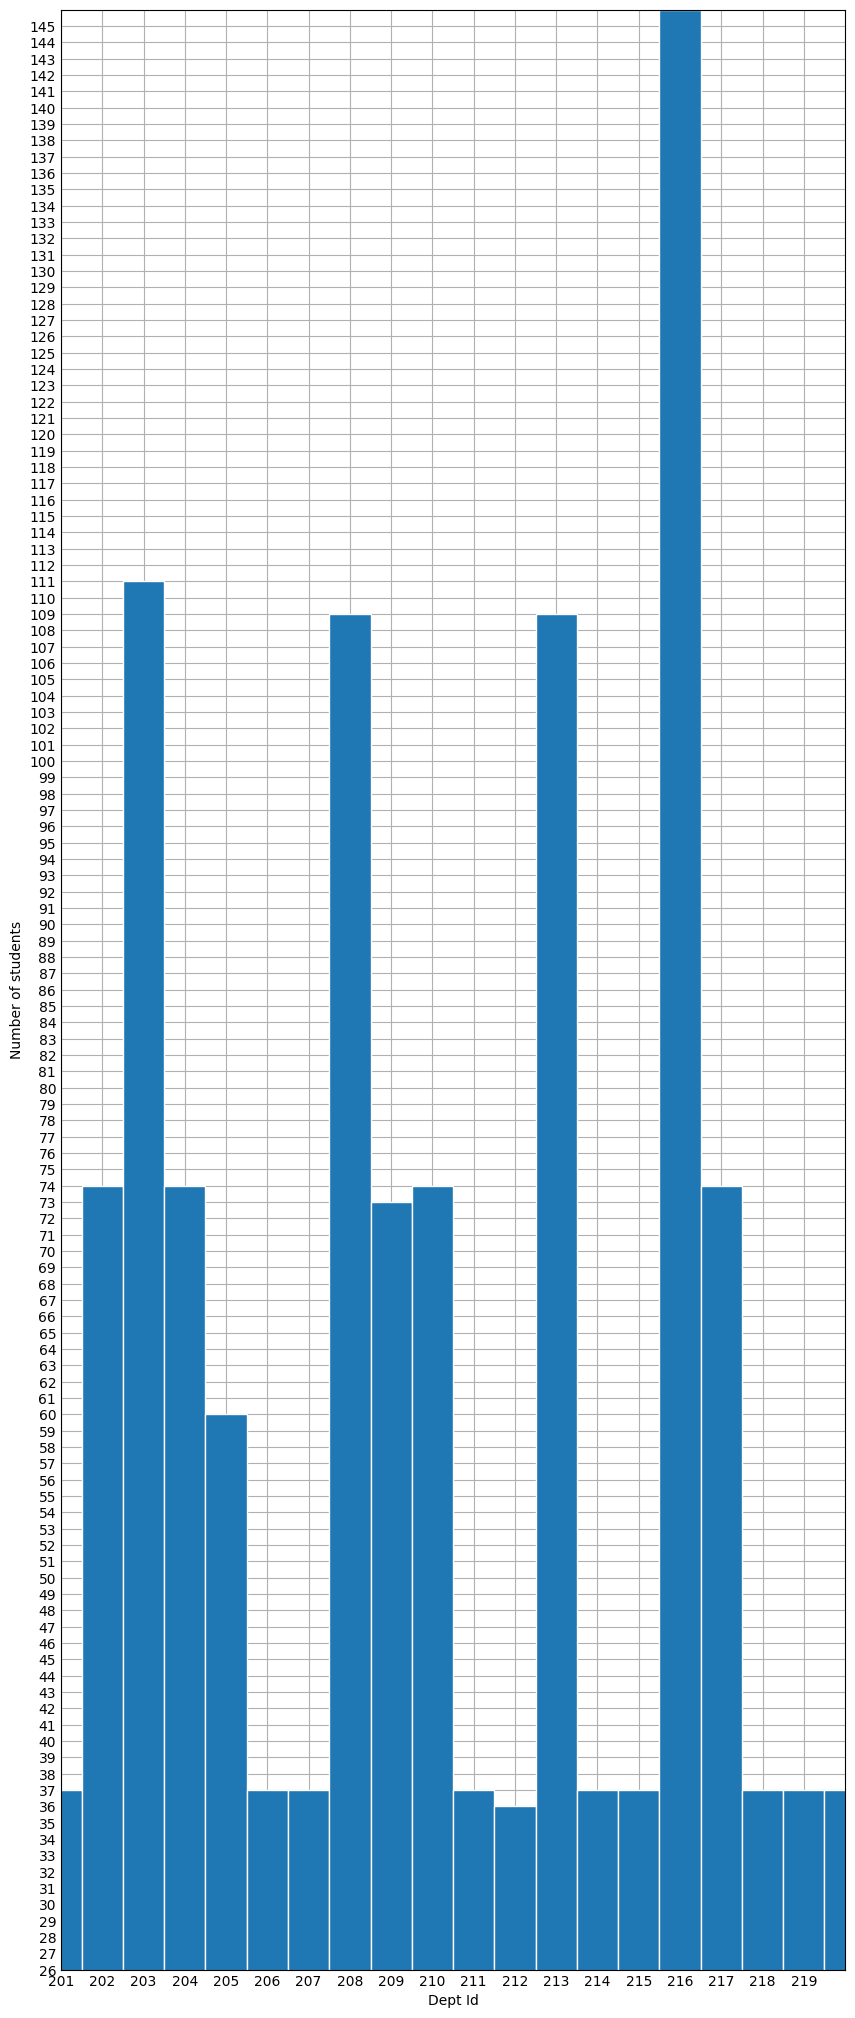

In [72]:
df = df.sort_values(by=["DeptID"])
deptid = list(df['DeptID'])
numberofstudent = list(df["NumberOfStudents"])

plt.style.use('_mpl-gallery')

plt.rcParams["figure.figsize"] = (8,20)


x = deptid
y = numberofstudent

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=1)

ax.set(xlim=(deptid[0], deptid[-1]), xticks=np.arange(deptid[0], deptid[-1]),
       ylim=(min(numberofstudent)-10, max(numberofstudent)), yticks=np.arange(min(numberofstudent)-10, max(numberofstudent)))

plt.xlabel("Dept Id")
plt.ylabel("Number of students")
# plt.xticks(fon)
# plt.figure(figsize=(4,4))
plt.savefig("D:/Darshana/NEU/Study/DMDD/Project/MStudents/Assignment3/Query4.png", dpi=300, bbox_inches='tight')
plt.show()


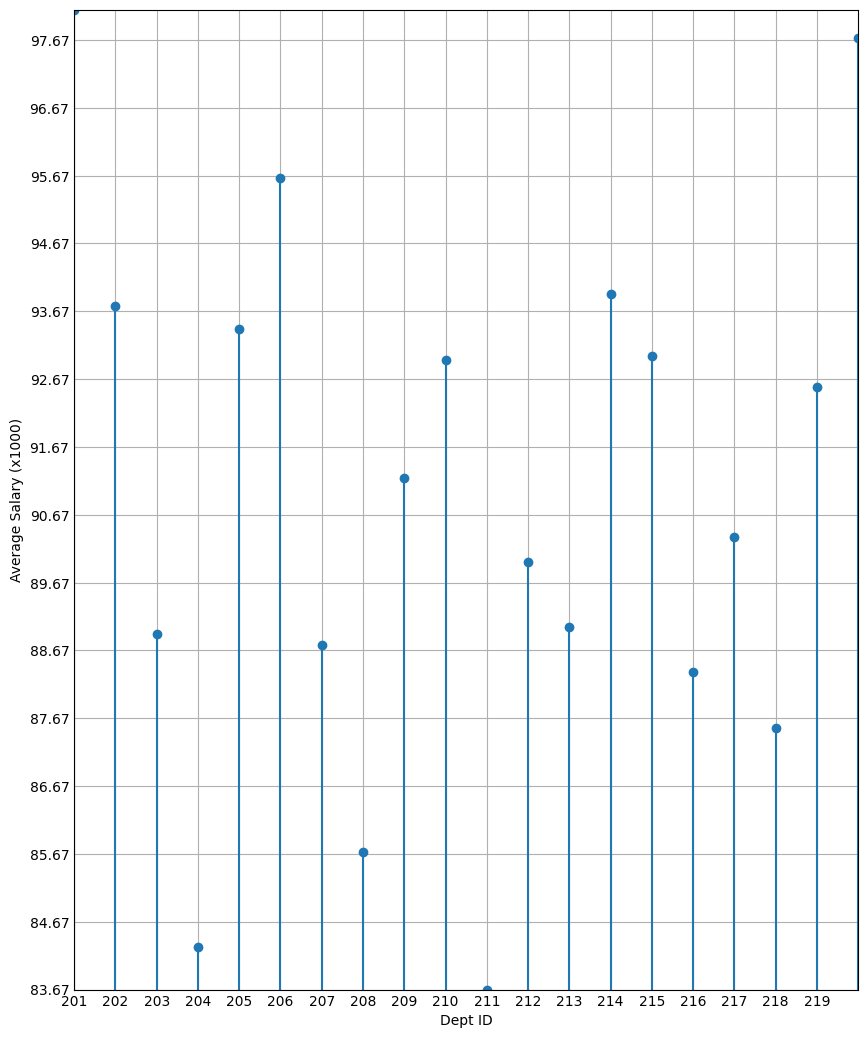

In [147]:

df = pd.read_csv("D:/Darshana/NEU/Study/DMDD/Project/MStudents/Assignment3/Query5.csv")

plt.style.use('_mpl-gallery')
plt.rcParams["figure.figsize"] = (8,10)

deptid = df["DeptID"]
average = df['Average']
average = [a/1000 for a in average]
# make data

y = average

# plot
fig, ax = plt.subplots()

# ax.plot(x, y, linewidth=1)


deptid = list(deptid)
xn = range(len(deptid))

ax.stem(deptid, y)

ax.set(xlim =(min(deptid), max(deptid)), xticks=np.arange(min(deptid), max(deptid))
       ,ylim=(min(average), max(average)), yticks=np.arange(min(average), max(average)))

plt.xlabel("Dept ID")
plt.ylabel("Average Salary (x1000)")

plt.savefig("D:/Darshana/NEU/Study/DMDD/Project/MStudents/Assignment3/Query5.png", dpi=300, bbox_inches='tight')


plt.show()